Siia hakkab ilmuma projekt.  
TODO:
<ol>
<li> Andmete puhastamine. Mida vähem andmeridu meil on seda lihtsamaks me oma elu teeme. Kaaluiived on mitmes korduses.</li>
<li> Andmete normaliseerimine.</li>
<li> Mudeli treenimine </li>
<li></li>
</ol> 



In [3]:
import pandas as pd

In [18]:
df = pd.read_csv("Pregnancy_Data.csv")
df['bmi'] = df['bmi'].str.replace(',','.')
df=df.astype({'bmi': 'float64'})
df.dtypes

A                                 int64
idcode                            int64
bmi                             float64
gdm                               int64
gdm_jm                            int64
vanus_algul                       int64
kmiyle25                          int64
mitmes_syn                        int64
gdm_varem                       float64
suur_laps_varem                   int64
fasting_glycose                 float64
gestage_gtt1                    float64
gestage_gtt_ndalates            float64
gestage_gtt2                    float64
gestage_gtt2_ndalates           float64
synnitus                         object
synnitus_ras_kestus_paevades      int64
ga_week                           int64
sugu                              int64
synnikaal                         int64
makrosoomia                       int64
kaal_enne                       float64
pikkus                          float64
gestage                           int64
maxtotalkaal                    float64


Dropping irrelevant data

In [20]:
columns_before = df.shape[1]
df = df.drop("idcode", axis=1) # We do not need to identify mothers.
df = df.drop("kmiyle25", axis=1) # There already exists BMI column. So flag that tells whether it is higher than 25 is useless.

#Since the timing of glucose tolerance test does matter.
df = df.drop("fasting_glycose", axis=1)
df = df.drop("gestage_gtt_ndalates", axis=1)
df = df.drop("gestage_gtt1", axis=1)
df = df.drop("gestage_gtt2_ndalates", axis=1)
df = df.drop("gestage_gtt2", axis=1)

#We already have difference of days, so we do not need to record any dates.
df = df.drop("synnitus", axis=1)
df = df.drop("datekuni20", axis=1)
df = df.drop("datekuni24", axis=1)
df = df.drop("datekuni28", axis=1)
df = df.drop("datekuni34", axis=1)
df = df.drop("dateviimane", axis=1)
df = df.drop("pikkus", axis=1) # Height is taken into account in BMI column.

#Kaaluiivete hunja kuidagi kavalalt. Kas a) protsentuaalne kaalukasv 

print("We removed " +  str(columns_beforedf.shape[1]) + " columns")



KeyError: "['idcode'] not found in axis"

Renaming bad column names.

In [14]:
df.rename(columns={"synnitus_ras_kestus_paevades": "pregnancy_duration_in_days",
                   "ga_week": "pregnancy_duration_in_weeks",
                  
                  })

,A,bmi,gdm,gdm_jm,vanus_algul,kmiyle25,mitmes_syn,gdm_varem,suur_laps_varem,pregnancy_duration_in_days,...,kaaluiivekuni34,gestage_viimane,dateviimane,kaal_viimane_enne synnitust,kaaluiivekuniviimasekaaluni,iive_alg_kuni_hiljemkui34,iive_20hiljemkui34,iive_24_hiljemkui34,iive_28_hiljemkui34,iive_34_kuni_hiljemkui34
0,1,29.000595,0,1,42,1,1,NaN,0,284,...,7.7,279.0,27-DEC-18,78.0,8.0,8.0,5.0,2.5,1.6,0.3
1,3,27.885187,0,2,40,1,2,0.0,0,273,...,19.4,267.0,05-MAR-19,97.5,22.5,22.5,12.3,9.2,7.5,3.1
2,4,18.253110,1,3,36,0,3,0.0,0,275,...,13.5,263.0,19-FEB-19,69.5,15.5,15.5,12.0,6.5,5.0,2.0
3,5,23.289616,0,1,35,0,2,0.0,0,274,...,7.6,262.0,06-JUL-18,79.8,10.9,10.9,8.7,6.6,4.6,3.3
4,6,20.861120,0,0,35,0,2,0.0,0,248,...,NaN,157.0,06.Nov.18,67.0,6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2022,26.674874,0,2,24,1,1,NaN,0,288,...,6.7,282.0,12-MAR-19,87.1,9.1,9.1,6.1,7.5,5.9,2.4
1768,2023,27.434842,0,1,26,1,1,NaN,0,256,...,16.4,247.0,27-JUL-18,89.1,17.1,17.1,11.9,10.3,4.9,0.7
1769,2024,21.230572,0,2,24,0,2,0.0,0,279,...,11.6,271.0,23-MAY-19,66.0,13.0,13.0,6.0,66.0,3.0,1.4
1770,2026,21.083563,0,0,32,0,3,0.0,0,279,...,14.5,271.0,28-DEC-18,76.9,19.5,19.5,13.9,13.3,10.4,5.0


In [3]:
df['kaaluiive'].count()

1771

In [4]:
for i in [df['kaaluiive'].count(), df['kaaluive_alla20'].count(), df['iive2024'].count(), df['iive2428'].count(), df['iive2028'].count(),df['iive2834'].count(),df['iive2434'].count(),df['iive2034'].count()]:
    print(i)

1771
1655
1433
1329
1493
1549
1464
1624


In [7]:
df['makrosoomia'].value_counts()

0    1487
1     285
Name: makrosoomia, dtype: int64

Allpool on näha kõigi mitte kuupäevaliste väärtuste jaotust väga labasel histogrammil.

C:\Users\halapuu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


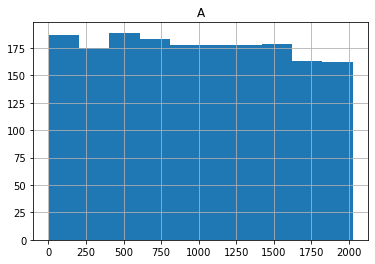

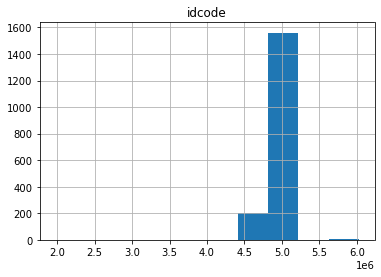

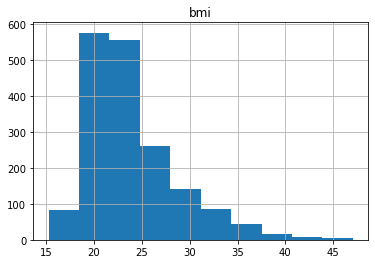

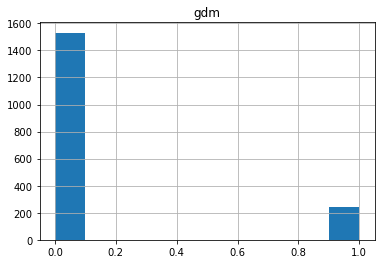

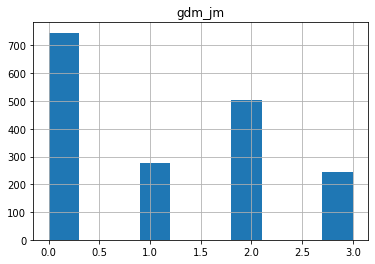

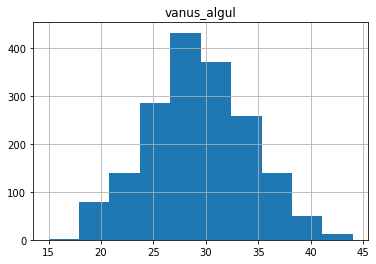

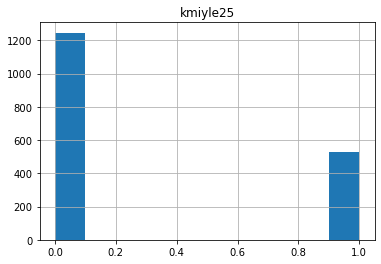

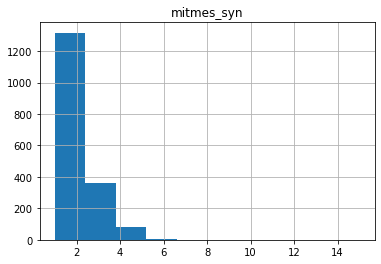

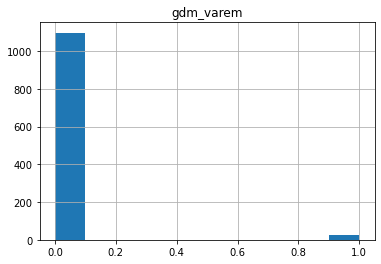

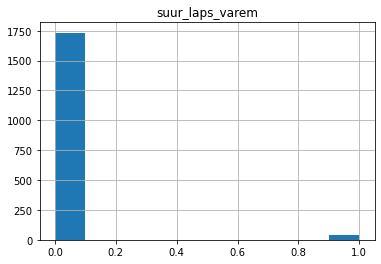

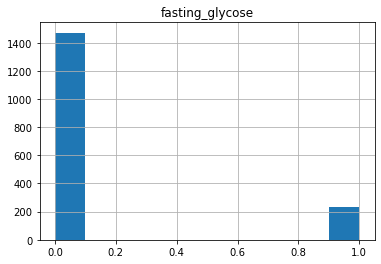

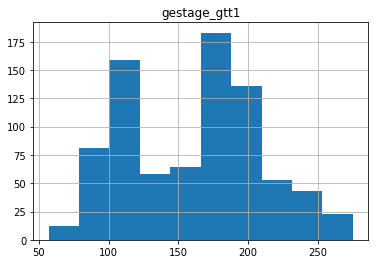

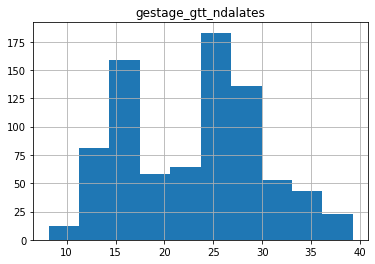

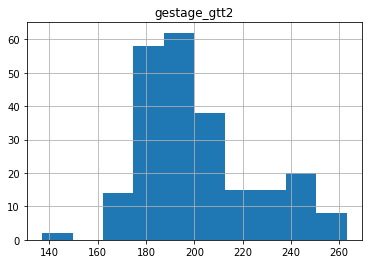

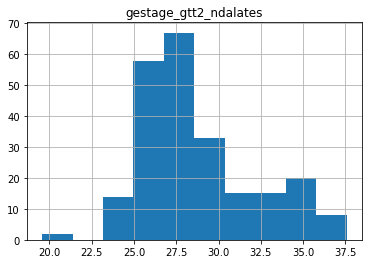

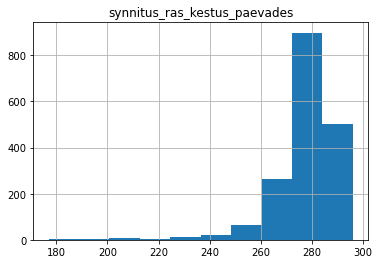

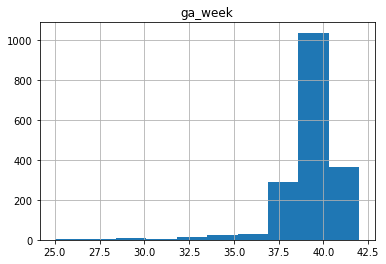

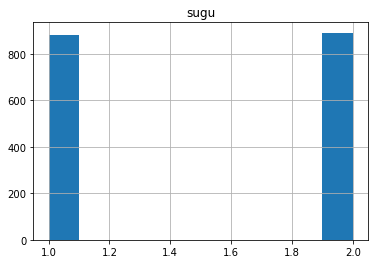

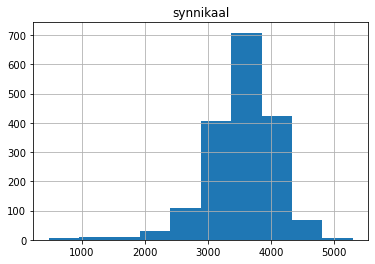

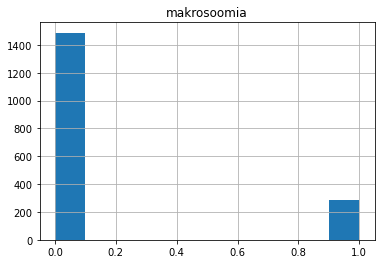

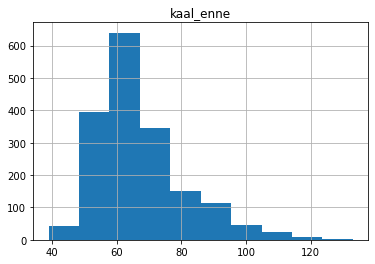

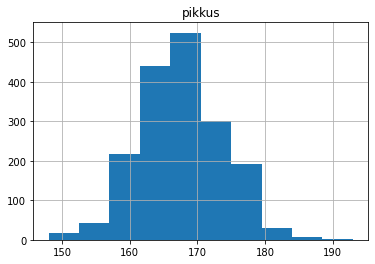

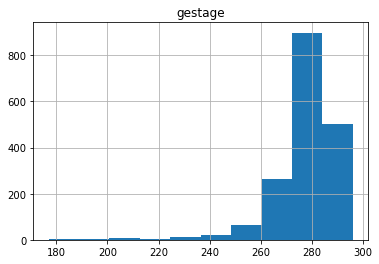

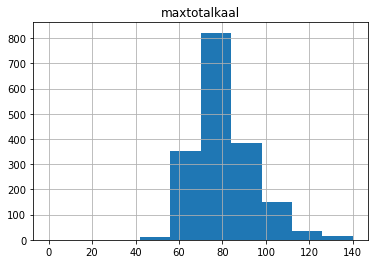

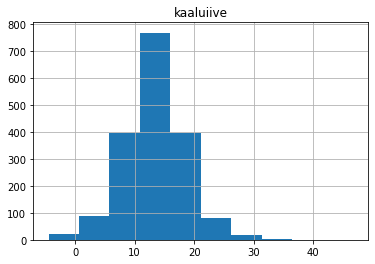

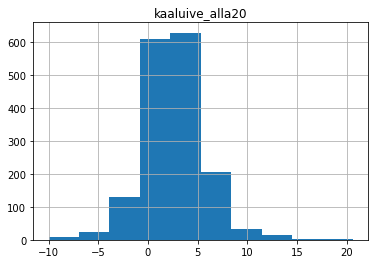

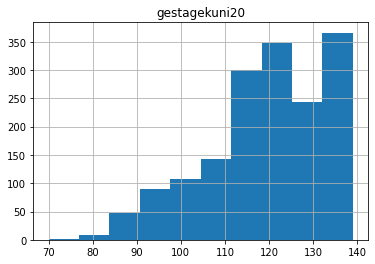

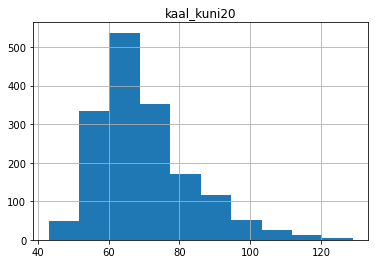

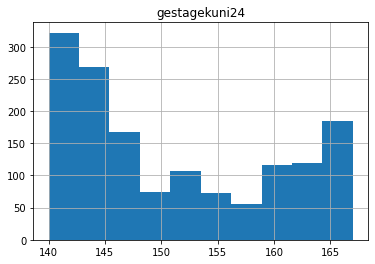

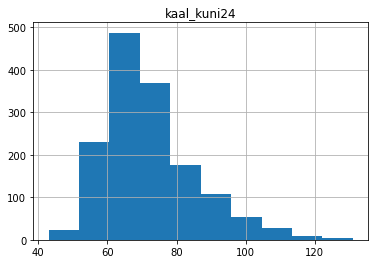

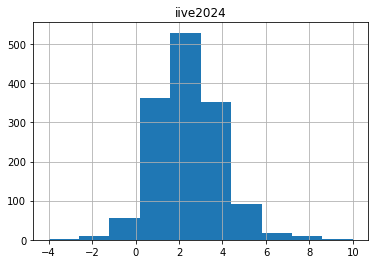

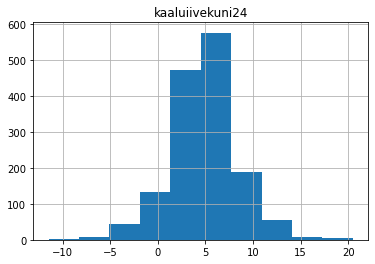

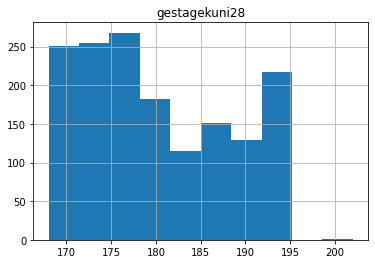

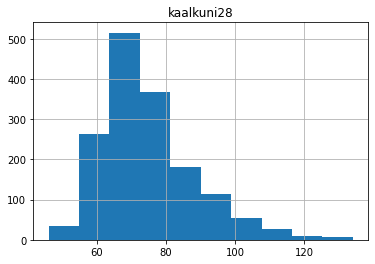

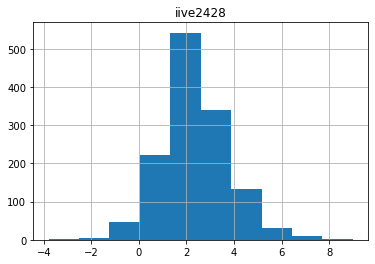

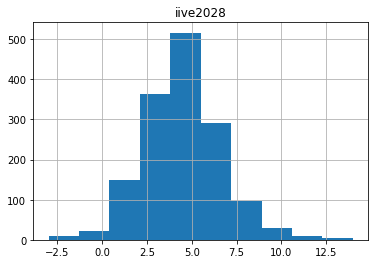

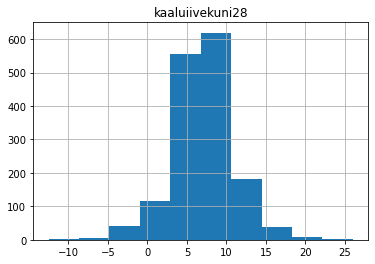

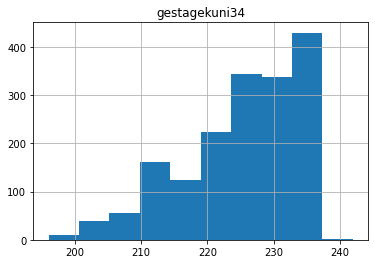

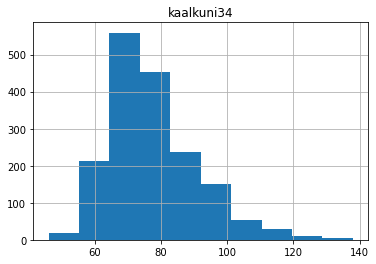

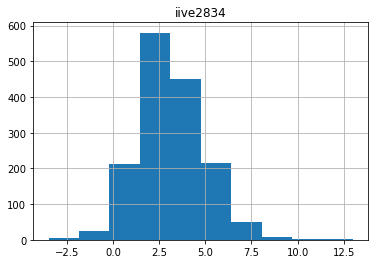

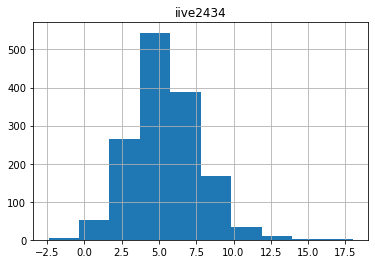

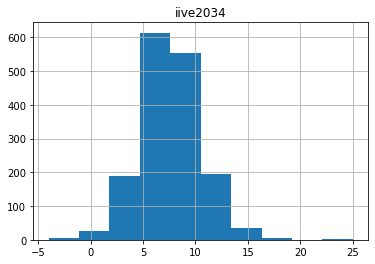

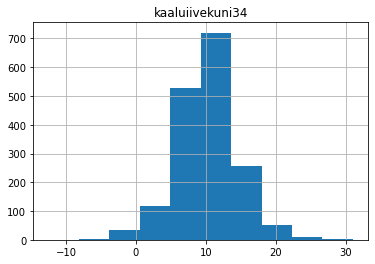

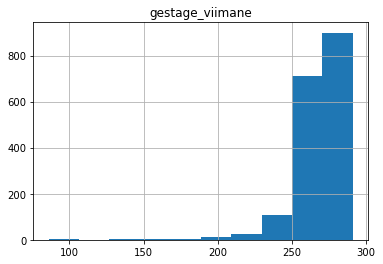

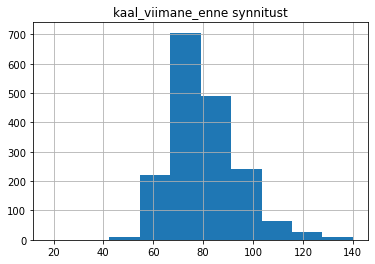

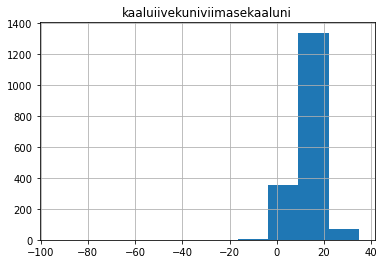

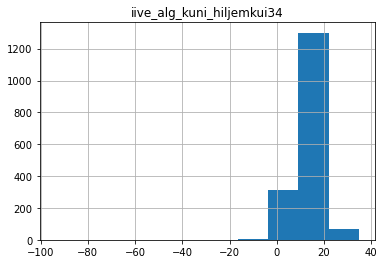

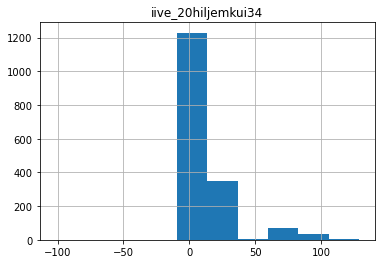

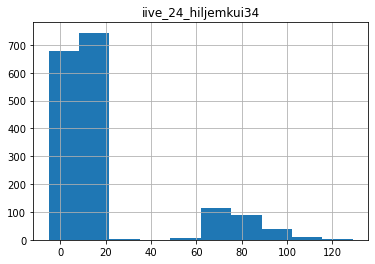

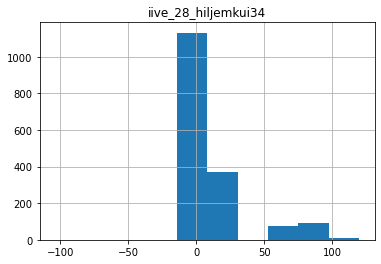

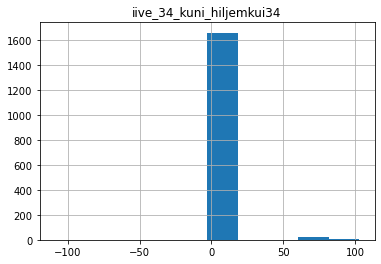

In [6]:
for field in df.columns:
    if df[field].dtype=='int64' or df[field].dtype=='float64':
        df.hist(column=field)